In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Analysis on Netflik Movies and TV SHOWS


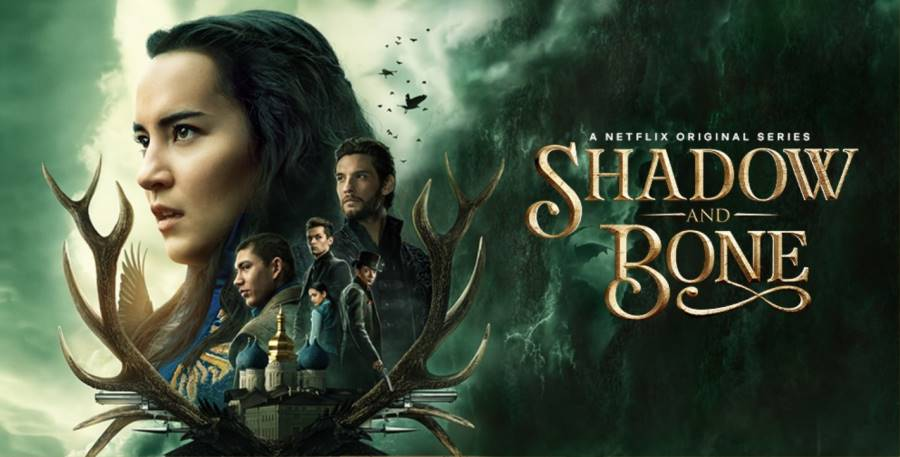

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('Netflix.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [4]:
df.info()
#We have some missing data in our dataset so let's work on that

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
df.isna().sum()
#checking for missing data

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
df['director'].fillna('Unknown', inplace = True)
df['cast'].fillna('Unknown', inplace = True)
df['country'].fillna('Unknown', inplace = True)
df['date_added'].fillna('Unknown', inplace = True)
df['rating'].fillna('Unknown', inplace = True)
#fixing the missing data

In [7]:
df.isna().sum()
#dataset all clean

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [8]:
df.drop(['show_id'], axis=1, inplace=True)
#dropping the less relevant column

In [9]:
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China","September 9, 2019",2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,"September 9, 2016",2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,"September 8, 2018",2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,"September 8, 2018",2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,"September 8, 2017",2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [10]:
df['type'].value_counts()

Movie      4265
TV Show    1969
Name: type, dtype: int64

Text(0.5, 1.0, 'count of Movies and Tv shows')

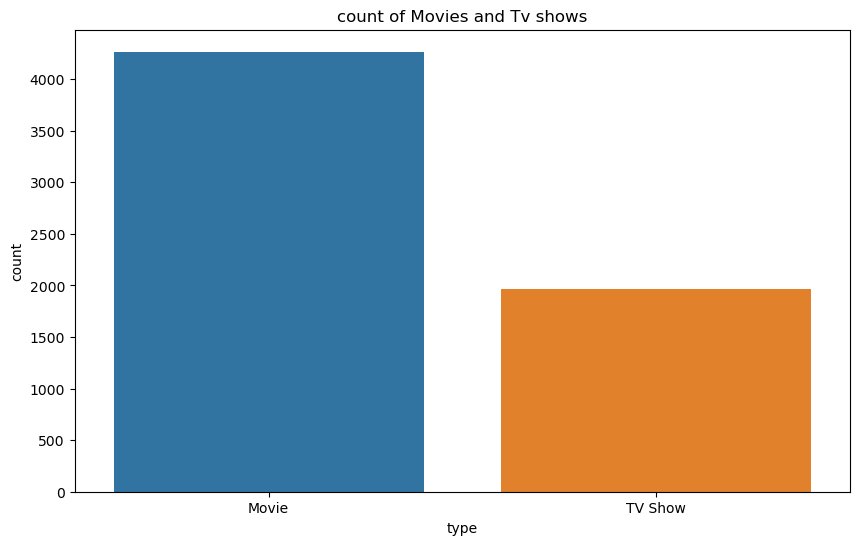

In [11]:
plt.figure(figsize=(10,6))
sns.countplot(df['type'])
plt.title('count of Movies and Tv shows')

1. `plt.figure(figsize=(10,6))`: This line sets the figure size of the plot to be 10 inches in width and 6 inches in height. By adjusting the figure size, you can control the dimensions of the resulting plot, which can be helpful in ensuring the visualizations are clear and legible.

2. `sns.countplot(df['type'])`: This line creates a count plot using `seaborn`'s `countplot` function. It takes the 'type' column from the DataFrame `df` as its data source. The 'type' column presumably contains categorical data that specifies whether each entry is a "Movie" or a "TV show."

A count plot is a type of bar plot that displays the count of each category in a categorical variable. In this case, it will show the number of movies and the number of TV shows present in the dataset.

3. `plt.title('count of Movies and Tv shows')`: This line sets the title of the plot to 'count of Movies and TV shows.' A descriptive title helps readers understand the purpose of the plot at a glance.

From the plotwe can understand that the number of movies netflik added is more than Tv shows


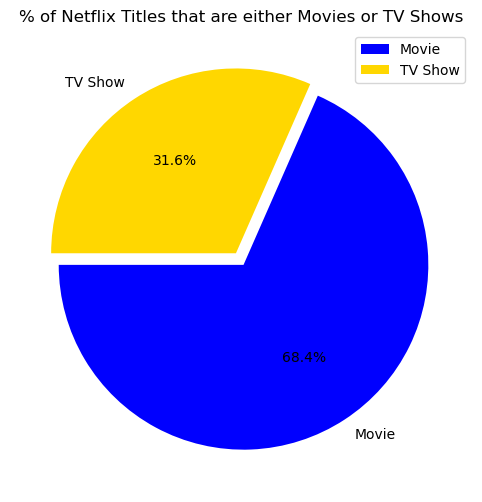

In [12]:
plt.figure(figsize=(12,6))
plt.pie(df['type'].value_counts(), explode=(0.025, 0.05), labels = df['type'].value_counts().index, 
        colors = ['blue', 'gold'], autopct = '%1.1f%%', startangle = 180)

plt.title("% of Netflix Titles that are either Movies or TV Shows")
plt.legend()
plt.show()

1. `plt.figure(figsize=(12,6))`: This line sets the figure size of the plot to be 12 inches in width and 6 inches in height. Adjusting the figure size ensures that the resulting pie chart is appropriately sized and legible.

2. `plt.pie(df['type'].value_counts(), explode=(0.025, 0.05), labels=df['type'].value_counts().index, colors=['blue', 'gold'], autopct='%1.1f%%', startangle=180)`: This line creates the pie chart with the following parameters:

   - `df['type'].value_counts()`: This part calculates the counts of each unique value in the 'type' column. In this case, it will count the occurrences of "Movies" and "TV shows" in the DataFrame `df`.

   - `explode=(0.025, 0.05)`: This parameter specifies the extent to which the slices of the pie chart are separated from the center. The first value (0.025) corresponds to the "Movies" slice, and the second value (0.05) corresponds to the "TV shows" slice. The slices with higher explode values will be more detached from the center, emphasizing them in the plot.

   - `labels=df['type'].value_counts().index`: This sets the labels for the pie chart. The labels will correspond to the unique values in the 'type' column, which are "Movies" and "TV shows."

   - `colors=['blue', 'gold']`: This parameter defines the colors of the two slices in the pie chart. The "Movies" slice will be displayed in blue, and the "TV shows" slice will be displayed in gold.

   - `autopct='%1.1f%%'`: This parameter adds the percentage values to each slice of the pie chart, displaying the proportion of "Movies" and "TV shows" relative to the whole.

   - `startangle=180`: This parameter sets the starting angle of the first slice. The value 180 degrees will position the first slice (Movies) on the left side of the pie chart.

3. `plt.title("% of Netflix Titles that are either Movies or TV Shows")`: This line sets the title of the pie chart to "% of Netflix Titles that are either Movies or TV Shows." A clear and informative title helps viewers understand the purpose of the visualization.

4. `plt.legend()`: This line adds a legend to the pie chart, which will display the labels ("Movies" and "TV shows") and their corresponding colors.

5. `plt.show()`: This command displays the pie chart.

Observation:
There are 4265 Movies (68.4%) and 1969 TV Shows (31.6%) on Netflix. This makes sense since TV shows are always an ongoing and have many episodes. If we were to do a headcount of TV show episodes vs. movies, I am sure that TV shows would have come out as the majority. However, in terms of title, there are far more movie titles (68.5%) than TV show titles (31.5%).

In [13]:
df['rating'].unique()

array(['TV-PG', 'TV-MA', 'TV-Y7-FV', 'TV-Y7', 'TV-14', 'R', 'TV-Y', 'NR',
       'PG-13', 'TV-G', 'PG', 'G', 'Unknown', 'UR', 'NC-17'], dtype=object)

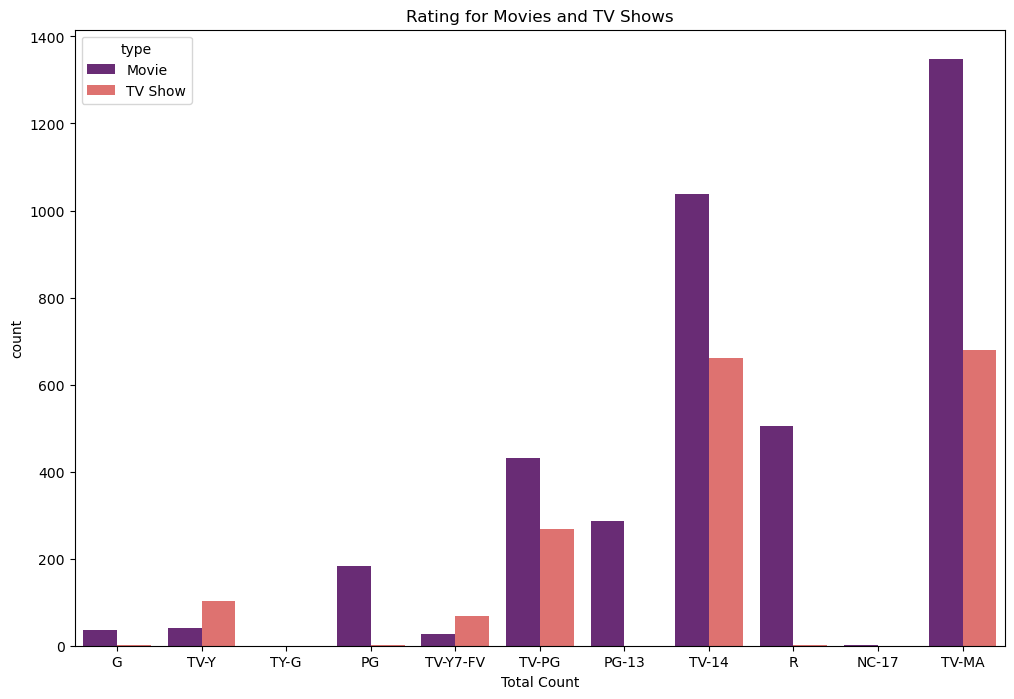

In [14]:
my_order = ['G', 'TV-Y', 'TY-G', 'PG', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']
plt.figure(figsize=(12,8))
sns.countplot(df['rating'], hue= df['type'], palette='magma', order = my_order)
plt.title('Rating for Movies and TV Shows')
plt.xlabel('Ratings')
plt.xlabel('Total Count')
plt.show()

1. `my_order = ['G', 'TV-Y', 'TY-G', 'PG', 'TV-Y7-FV', 'TV-PG', 'PG-13', 'TV-14', 'R', 'NC-17', 'TV-MA']`: This line defines a custom order for the content ratings. The `my_order` list specifies the order in which the ratings will appear on the x-axis of the count plot. Customizing the order is useful when you want to display the ratings in a specific sequence rather than the default alphabetical order.

2. `plt.figure(figsize=(12,8))`: This line sets the figure size of the plot to be 12 inches in width and 8 inches in height. By adjusting the figure size, you can ensure that the resulting plot is large enough to display the information clearly.

3. `sns.countplot(df['rating'], hue=df['type'], palette='magma', order=my_order)`: This line creates the count plot using `seaborn`'s `countplot` function. The plot is based on two categorical variables:

   - `df['rating']`: This specifies the data for the x-axis, representing the content ratings of the titles in the dataset.
   - `hue=df['type']`: This parameter differentiates the count of ratings for each content type (Movies and TV shows) by using different colors for each type. The 'type' column is assumed to contain categorical data indicating whether each entry is a "Movie" or a "TV show."
   
   - `palette='magma'`: This parameter sets the color palette for the bars in the plot. The 'magma' palette is used here, which ranges from dark purples to bright yellows, providing a visually appealing and easily distinguishable color scheme.

   - `order=my_order`: This parameter specifies the custom order of the content ratings on the x-axis. This helps in maintaining consistency if there are some specific ratings that are more relevant or commonly used in the dataset.

4. `plt.title('Rating for Movies and TV Shows')`: This line sets the title of the plot to 'Rating for Movies and TV Shows,' providing an overview of the plot's purpose.

5. `plt.xlabel('Ratings')`: This line labels the x-axis as 'Ratings,' indicating the content rating categories being represented on the x-axis.

6. `plt.ylabel('Total Count')`: This line labels the y-axis as 'Total Count,' representing the count of titles corresponding to each content rating.

7. `plt.show()`: This command displays the count plot.

Observation:
The resulting count plot provides a visual representation of the distribution of content ratings for both "Movies" and "TV shows" in the Netflix dataset represented by the DataFrame `df`.

- The x-axis displays the different content ratings, ordered as specified in the `my_order` list. Each bar represents a content rating category.

- The y-axis represents the total count of titles corresponding to each content rating category.

- The bars are differentiated by color, with different colors used for "Movies" and "TV shows." This allows for easy comparison of the count of ratings between the two types of content.

- You can also spot any content rating categories that may be more or less common for a particular type of content, which can provide insights into how different types of content are rated and classified.

There are more movie contents for matured audience than TV Shows. Infact there are much more movie content than tv shows for almost all category of viewers. There are more TV Shows in these three viewers categories: TV-Y, TV-Y7, and TV-Y7-FV.



In [15]:
movies_df = df[df['type'] == 'Movie']
series_df = df[df['type'] == 'TV Show']
#Let's create a new data frame from the entire dataset exclusively for TV Shows and Movies

In [16]:
movies_df['duration'] = movies_df['duration'].str.replace(' min','').astype(int)

In [17]:
series_df['duration'] = series_df['duration'].replace({'1 Season' : '1 Seasons'}). str.replace('Seasons', '').astype(int)

Text(0, 0.5, 'Total Counts')

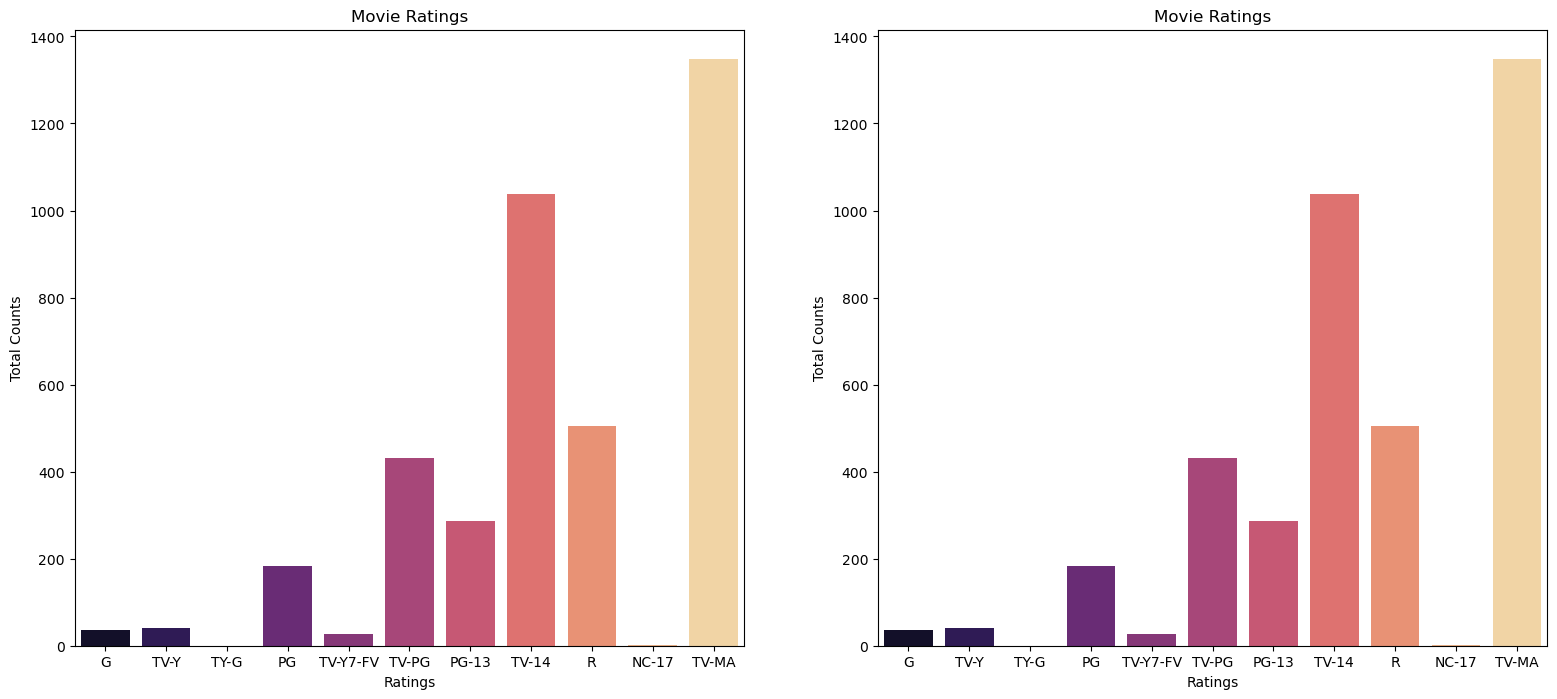

In [18]:
fig, ax = plt.subplots(1,2,figsize=(19,8))
g1 = sns.countplot(movies_df['rating'], order = my_order, palette = 'magma', ax = ax[0])
g1.set_title('Movie Ratings')
g1.set_xlabel('Ratings')
g1.set_ylabel('Total Counts')

g2 = sns.countplot(movies_df['rating'], order = my_order, palette = 'magma', ax = ax[1])
g2.set_title('Movie Ratings')
g2.set_xlabel('Ratings')
g2.set_ylabel('Total Counts')

1. `fig, ax = plt.subplots(1, 2, figsize=(19, 8))`: This line creates a figure with two subplots arranged side by side. The figure size is set to be 19 inches in width and 8 inches in height. The `subplots` function returns two objects: `fig` (the figure object) and `ax` (a NumPy array containing the two axes objects representing the subplots).

2. `g1 = sns.countplot(movies_df['rating'], order=my_order, palette='magma', ax=ax[0])`: This line creates the first subplot (the left one) and plots a count plot using `seaborn`'s `countplot` function. The plot is based on the 'rating' column of the DataFrame `movies_df`, which represents the content ratings for movies.

   - `order=my_order`: This parameter specifies the custom order of the content ratings on the x-axis. The `my_order` list is used to maintain consistency in the order of the content ratings on both subplots.

   - `palette='magma'`: This parameter sets the color palette for the bars in the plot. The 'magma' palette is used here, ranging from dark purples to bright yellows, providing a visually appealing and easily distinguishable color scheme.

   - `ax=ax[0]`: This parameter assigns the first axis object (`ax[0]`) to the first subplot, which means the count plot will be displayed on the left side.

3. `g1.set_title('Movie Ratings')`: This line sets the title of the first subplot to 'Movie Ratings.'

4. `g1.set_xlabel('Ratings')`: This line labels the x-axis of the first subplot as 'Ratings,' representing the content rating categories.

5. `g1.set_ylabel('Total Counts')`: This line labels the y-axis of the first subplot as 'Total Counts,' representing the count of movie titles corresponding to each content rating category.

6. `g2 = sns.countplot(movies_df['rating'], order=my_order, palette='magma', ax=ax[1])`: This line creates the second subplot (the right one) and plots another count plot based on the 'rating' column of the DataFrame `movies_df`.

   - `ax=ax[1]`: This parameter assigns the second axis object (`ax[1]`) to the second subplot, which means the count plot will be displayed on the right side.

7. `g2.set_title('Movie Ratings')`: This line sets the title of the second subplot to 'Movie Ratings.'

8. `g2.set_xlabel('Ratings')`: This line labels the x-axis of the second subplot as 'Ratings,' representing the content rating categories.

9. `g2.set_ylabel('Total Counts')`: This line labels the y-axis of the second subplot as 'Total Counts,' representing the count of movie titles corresponding to each content rating category.

Observation:
- Both subplots have the same title ('Movie Ratings'), x-axis label ('Ratings'), and y-axis label ('Total Counts'). This indicates that both subplots share the same information and are meant to compare the count of movie ratings between the two subplots.

- By comparing the two subplots, you can quickly identify any differences in the distribution of content ratings for movies between the left and right sides.

Overall, there is much more content for a more mature audience. For the mature audience, there is much more movie content than there are TV shows. However, for the younger audience (under the age of 17), it is the opposite, there are slightly more TV shows than there are movies.

### The Amount Of Contents Added On Netflix Each Year

Before we carry out this analysis, we'll have to first eleminate the 'Unknown' entries in the date_added column to enable us convert the column to datetime

In [19]:
movies_df = movies_df[movies_df['date_added']!= 'Unknown']
series_df = series_df[series_df['date_added']!= 'Unknown']
# removing the unknown entries from movies and tv shows dataset

In [20]:
series_df['year_added'] = pd.to_datetime(series_df['date_added']).dt.year
movies_df['year_added'] = pd.DatetimeIndex(movies_df['date_added']).year
series_df['month_added'] = pd.DatetimeIndex(series_df['date_added']).month
movies_df['month_added'] = pd.DatetimeIndex(movies_df['date_added']).month
# converting to datetime and creating new column for year and month respectively

Now we will take a look at the amount of content Netflix has added throughout the previous years. Since we are interested in when Netflix added the title onto their platform, we will add a 'year_added' column shows the year of the date from the 'date_added' column as shown above.

In [21]:
movies_year = movies_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index':'year', 'year_added':'count'})

In [22]:
movies_year

,year,count
0,2019,1546
1,2018,1290
2,2017,913
3,2016,264
4,2020,147
5,2015,58
6,2014,19
7,2011,13
8,2013,6
9,2012,4


In [23]:
series_year = series_df['year_added'].value_counts().to_frame().reset_index().rename(columns={'index':'year', 'year_added':'count'})
series_year

,year,count
0,2019,803
1,2018,492
2,2017,387
3,2016,192
4,2020,37
5,2015,32
6,2013,6
7,2014,6
8,2012,3
9,2008,1


Text(0.5, 1.0, 'The Number of Content Added on Netflik Each Year')

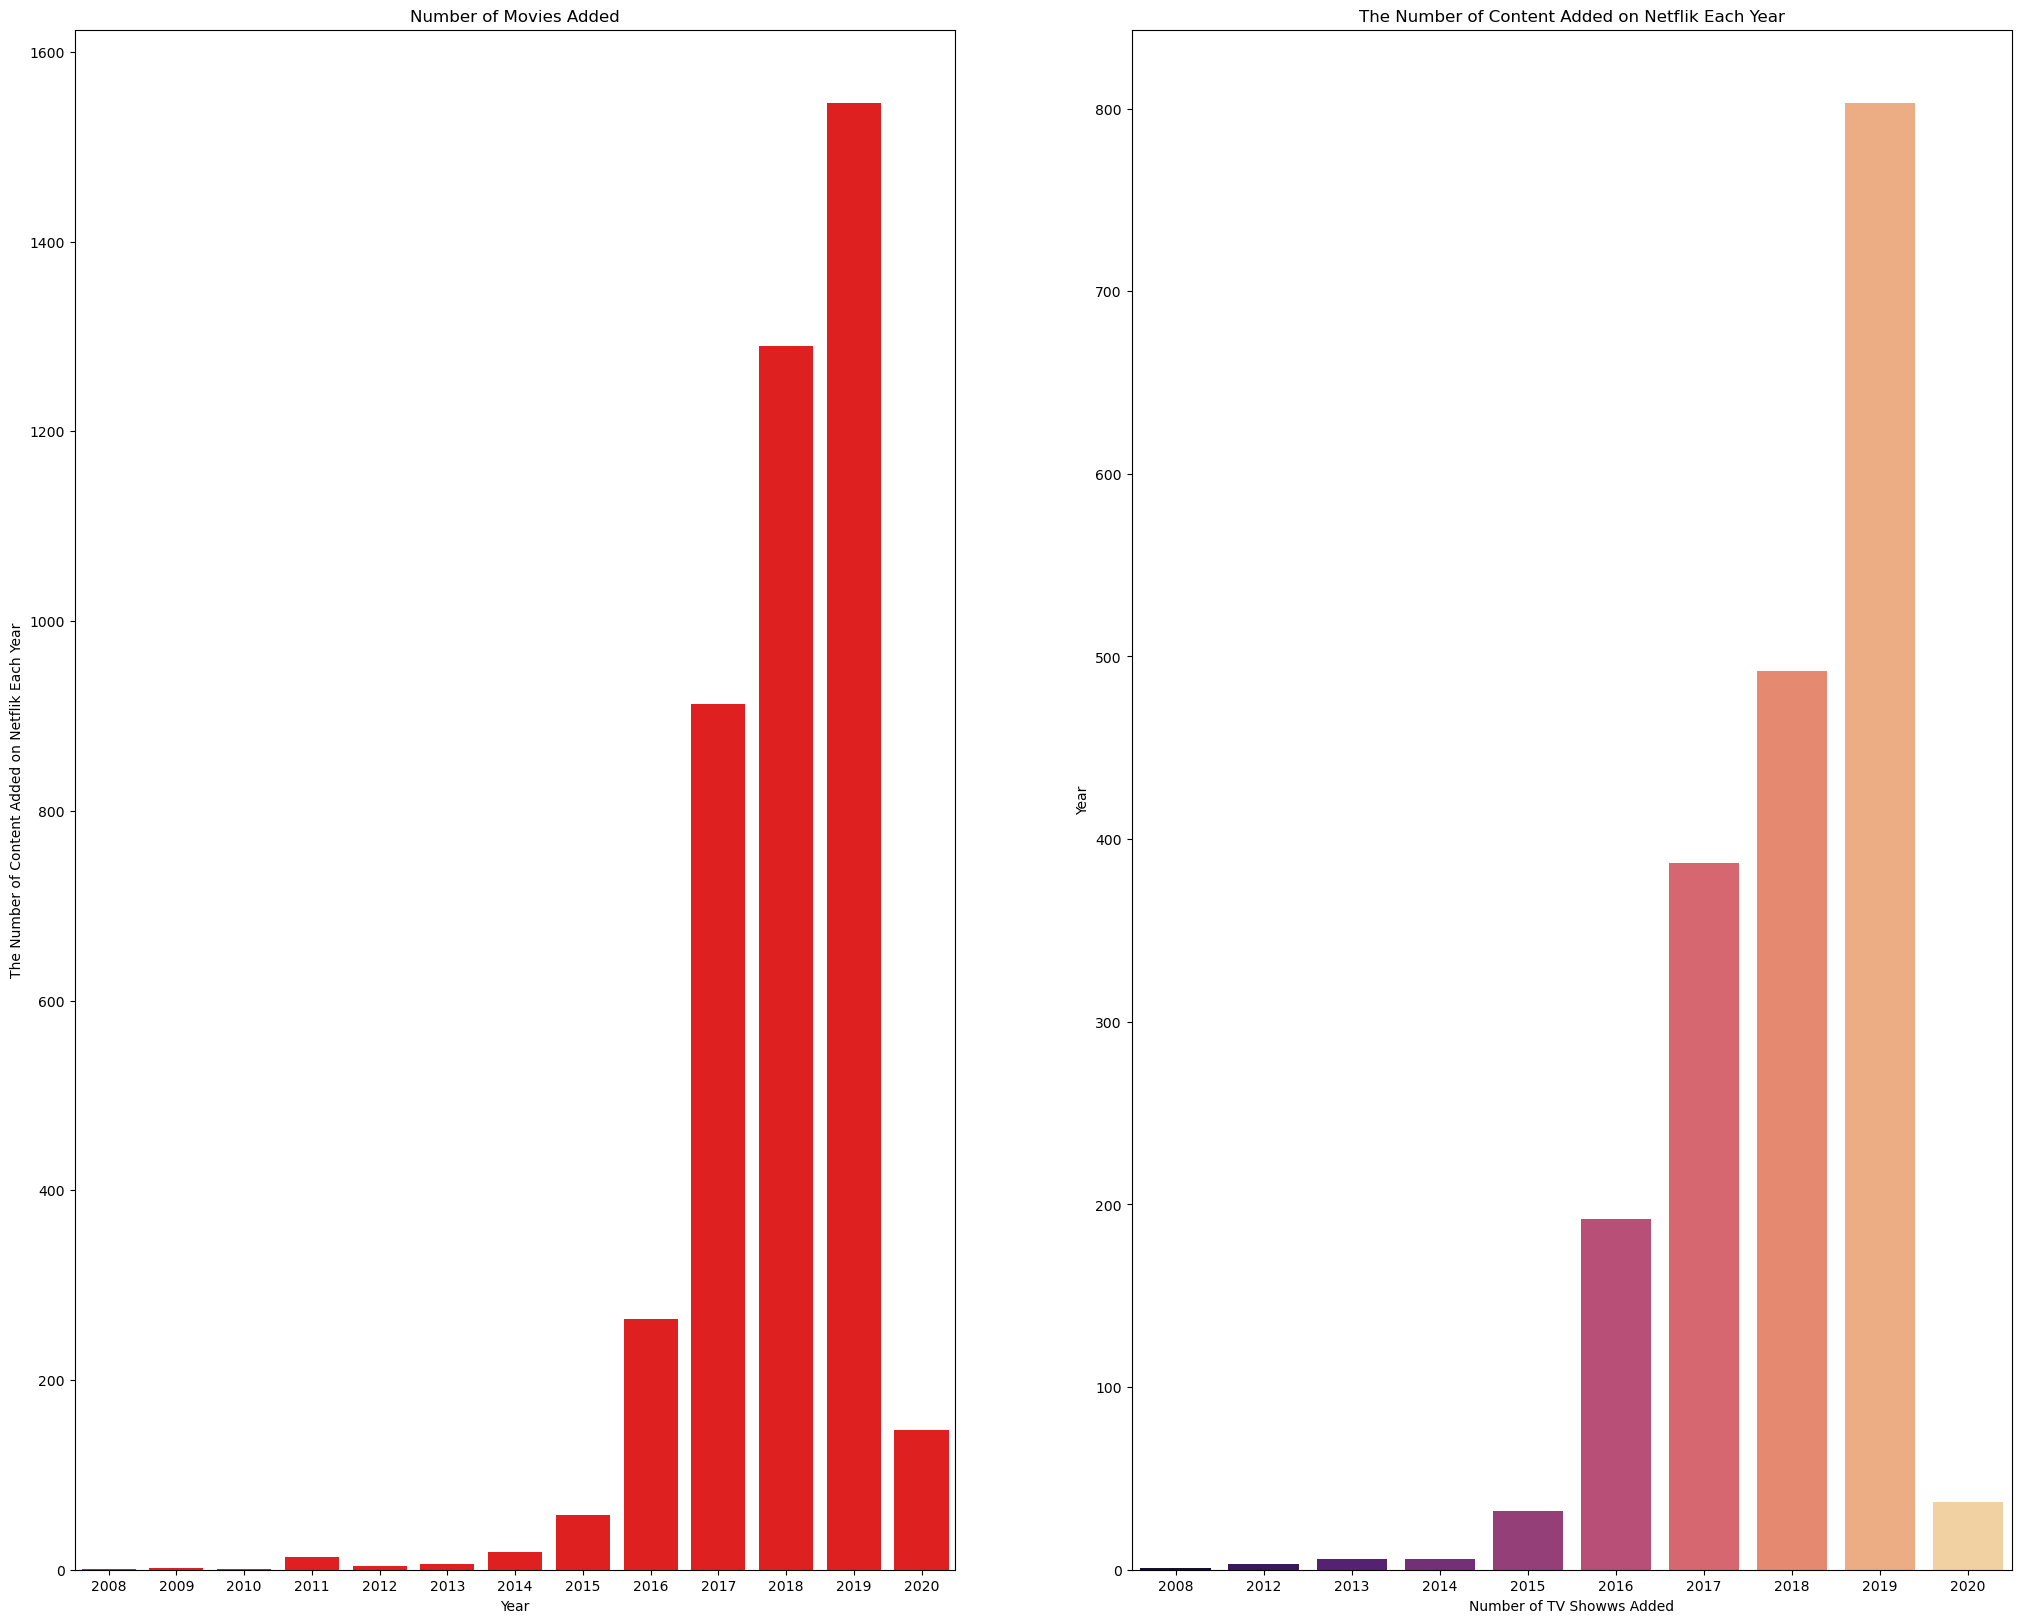

In [24]:
fig, ax = plt.subplots(1,2,figsize=(25,20))
g1 = sns.barplot(data = movies_year, x = 'year', y = 'count' ,color ='red', ax = ax[0])
g1.set_title('Number of Movies Added')
g1.set_xlabel('Year')
g1.set_ylabel('The Number of Content Added on Netflik Each Year')

g2 = sns.barplot(data = series_year, x = 'year', y = 'count', palette ='magma', ax = ax[1])
g2.set_xlabel('Number of TV Showws Added')
g2.set_ylabel('Year')
g2.set_title('The Number of Content Added on Netflik Each Year')

1. `fig, ax = plt.subplots(1, 2, figsize=(19, 8))`: This line creates a figure with two subplots arranged side by side. The figure size is set to be 19 inches in width and 8 inches in height. The `subplots` function returns two objects: `fig` (the figure object) and `ax` (a NumPy array containing the two axes objects representing the subplots).

2. `g1 = sns.countplot(movies_df['rating'], order=my_order, palette='magma', ax=ax[0])`: This line creates the first subplot (the left one) and plots a count plot using `seaborn`'s `countplot` function. The plot is based on the 'rating' column of the DataFrame `movies_df`, which represents the content ratings for movies.

   - `order=my_order`: This parameter specifies the custom order of the content ratings on the x-axis. The `my_order` list is used to maintain consistency in the order of the content ratings on both subplots.

   - `palette='magma'`: This parameter sets the color palette for the bars in the plot. The 'magma' palette is used here, ranging from dark purples to bright yellows, providing a visually appealing and easily distinguishable color scheme.

   - `ax=ax[0]`: This parameter assigns the first axis object (`ax[0]`) to the first subplot, which means the count plot will be displayed on the left side.

3. `g1.set_title('Movie Ratings')`: This line sets the title of the first subplot to 'Movie Ratings.'

4. `g1.set_xlabel('Ratings')`: This line labels the x-axis of the first subplot as 'Ratings,' representing the content rating categories.

5. `g1.set_ylabel('Total Counts')`: This line labels the y-axis of the first subplot as 'Total Counts,' representing the count of movie titles corresponding to each content rating category.

6. `g2 = sns.countplot(movies_df['rating'], order=my_order, palette='magma', ax=ax[1])`: This line creates the second subplot (the right one) and plots another count plot based on the 'rating' column of the DataFrame `movies_df`.

7. `g2.set_title('Movie Ratings')`: This line sets the title of the second subplot to 'Movie Ratings.'

8. `g2.set_xlabel('Ratings')`: This line labels the x-axis of the second subplot as 'Ratings,' representing the content rating categories.

9. `g2.set_ylabel('Total Counts')`: This line labels the y-axis of the second subplot as 'Total Counts,' representing the count of movie titles corresponding to each content rating category.

- The x-axis of each subplot displays the different content ratings, ordered as specified in the `my_order` list. Each bar represents a content rating category.

- The y-axis of each subplot represents the total count of movies corresponding to each content rating category.

- Both subplots have the same title ('Movie Ratings'), x-axis label ('Ratings'), and y-axis label ('Total Counts'). This indicates that both subplots share the same information and are meant to compare the count of movie ratings between the two subplots.

- By comparing the two subplots, you can quickly identify any differences in the distribution of content ratings for movies between the left and right sides.

From both plots we can see that 2019 ranked highest in both number of movies added and tv-shows


In [25]:
df = df[df['date_added'] != 'Unknown']

In [26]:
# converting the column to datetime and then creating a new column from it
df['date_added'] = pd.to_datetime(df['date_added'])

df['added_year'] = df['date_added'].dt.year
df.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,added_year
0,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,2019
1,Movie,Jandino: Whatever it Takes,Unknown,Jandino Asporaat,United Kingdom,2016-09-09,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,2016
2,TV Show,Transformers Prime,Unknown,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",2018
3,TV Show,Transformers: Robots in Disguise,Unknown,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,2018
4,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,2017


In [27]:
added_year_df = df['added_year'].value_counts().to_frame().reset_index().rename(columns={'index':'year', 'added_year':'count'})
added_year_df

,year,count
0,2019,2349
1,2018,1782
2,2017,1300
3,2016,456
4,2020,184
5,2015,90
6,2014,25
7,2011,13
8,2013,12
9,2012,7


Based on the above timeline, we can see that the popular streaming platform started gaining traction after 2014. Since then, the amount of content added has been tremendous. More so, we can see that there has been a consistent growth in the number of movies on Netflix compared to shows

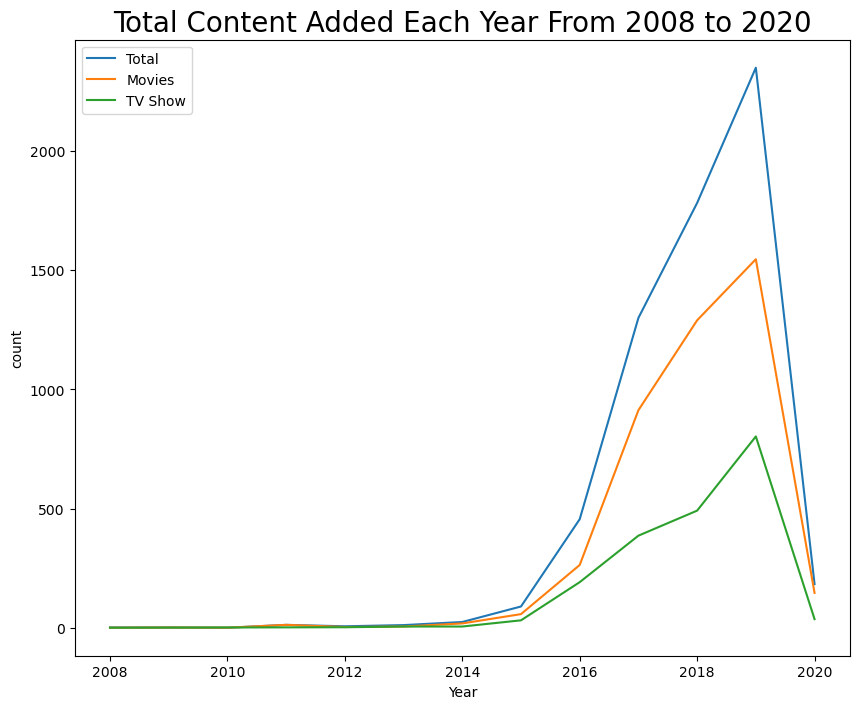

In [28]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(data = added_year_df, x = 'year', y = 'count')
sns.lineplot(data = movies_year, x = 'year', y = 'count')
sns.lineplot(data = series_year, x = 'year', y = 'count')
ax.set_title('Total Content Added Each Year From 2008 to 2020', fontsize=20)
ax.set_xlabel('Year')
g2.set_ylabel('Number of Contents')
plt.legend(['Total', 'Movies', 'TV Show'])

1. `fig, ax = plt.subplots(figsize=(10, 8))`: This line creates a figure and a single subplot. The figure size is set to be 10 inches in width and 8 inches in height. The `subplots` function returns two objects: `fig` (the figure object) and `ax` (the axis object representing the subplot).

2. `sns.lineplot(data=added_year_df, x='year', y='count')`: This line plots a line plot for the total content added to Netflix each year. The data is taken from the DataFrame `added_year_df`.

   - `data=added_year_df`: This parameter specifies the DataFrame containing the data for the total content added each year.

   - `x='year'`: This parameter specifies the column in `added_year_df` representing the years (x-axis data).

   - `y='count'`: This parameter specifies the column in `added_year_df` representing the count of total content added each year (y-axis data).

3. `sns.lineplot(data=movies_year, x='year', y='count')`: This line plots a line plot for the number of movies added to Netflix each year. The data is taken from the DataFrame `movies_year`.

4. `sns.lineplot(data=series_year, x='year', y='count')`: This line plots a line plot for the number of TV shows added to Netflix each year. The data is taken from the DataFrame `series_year`.

5. `ax.set_title('Total Content Added Each Year From 2008 to 2020', fontsize=20)`: This line sets the title of the plot to 'Total Content Added Each Year From 2008 to 2020' with a font size of 20.

6. `ax.set_xlabel('Year')`: This line labels the x-axis of the plot as 'Year,' representing the years from 2008 to 2020.

7. `g2.set_ylabel('Number of Contents')`: This line labels the y-axis of the plot as 'Number of Contents,' representing the count of total content, movies, and TV shows added.

8. `plt.legend(['Total', 'Movies', 'TV Shows'])`: This line adds a legend to the plot with labels 'Total,' 'Movies,' and 'TV Shows' for the respective lines.

Observation:
The resulting line plot displays the trends in the total content added, as well as the number of movies and TV shows added to Netflix each year from 2008 to 2020.

- The x-axis represents the years from 2008 to 2020, showing the progression of time.

- The y-axis represents the count of total content, movies, and TV shows added to Netflix each year.

- The blue line represents the trend of the total content added each year, which includes both movies and TV shows.

- The orange line represents the trend of the number of movies added to Netflix each year.

- The green line represents the trend of the number of TV shows added to Netflix each year.

- By examining the lines, you can identify any general trends or patterns in the growth of content on Netflix over the years.

- You can observe whether there are any significant spikes or drops in content additions during specific years or periods.

- The legend makes it easy to identify each line's category and understand the relationship between the trends of total content, movies, and TV shows.

- The title, axis labels, and legend labels are clear and informative, enhancing the interpretability of the plot.

This further shows that netflix grew and added more contents since 2016.

Text(0.5, 0, 'Season(s)')

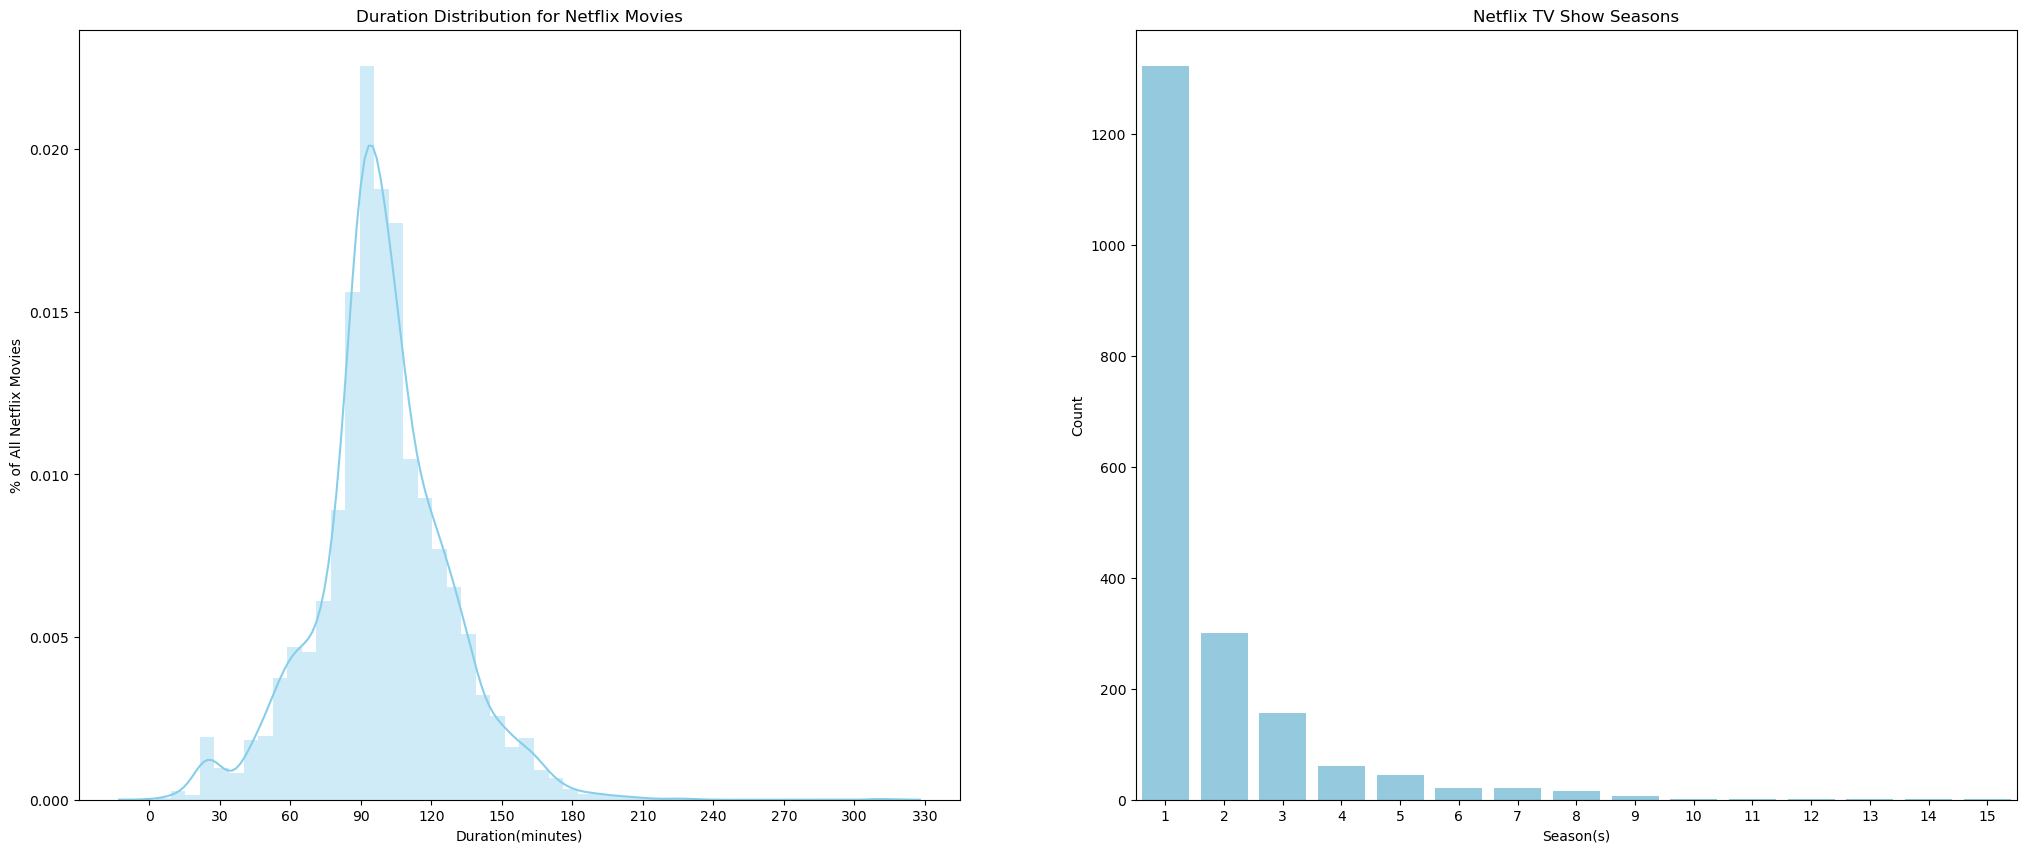

In [29]:
fig, ax = plt.subplots(1,2,figsize=(25,10))
g1 = sns.distplot(movies_df.duration, color = 'skyblue', ax = ax[0])
g1.set_xticks(np.arange(0,360,30))
g1.set_title("Duration Distribution for Netflix Movies")
g1.set_ylabel("% of All Netflix Movies")
g1.set_xlabel("Duration(minutes)")

g2 = sns.countplot(series_df.duration, color = 'skyblue', ax = ax[1]);
g2.set_title('Netflix TV Show Seasons')
g2.set_ylabel('Count')
g2.set_xlabel("Season(s)")

1. `fig, ax = plt.subplots(1, 2, figsize=(25, 10))`: This line creates a figure with two subplots side by side. The figure size is set to be 25 inches in width and 10 inches in height. The `subplots` function returns two objects: `fig` (the figure object) and `ax` (a NumPy array containing the two axes objects representing the subplots).

2. `g1 = sns.distplot(movies_df.duration, color='skyblue', ax=ax[0])`: This line creates the first subplot (the left one) and plots a distribution plot (histogram) using `seaborn`'s `distplot` function. The plot represents the distribution of movie durations in the DataFrame `movies_df`.

   - `movies_df.duration`: This specifies the data for the first subplot, which is the 'duration' column from the DataFrame `movies_df`. The 'duration' column presumably contains the duration (in minutes) of each movie.

   - `color='skyblue'`: This parameter sets the color of the histogram bars in the left subplot to sky blue.

   - `ax=ax[0]`: This parameter assigns the first axis object (`ax[0]`) to the first subplot, which means the distribution plot will be displayed on the left side.

3. `g1.set_xticks(np.arange(0, 360, 30))`: This line sets the x-axis ticks for the first subplot to be at intervals of 30 minutes from 0 to 360 minutes. This ensures that the x-axis ticks are evenly spaced and easily interpretable.

4. `g1.set_title("Duration Distribution for Netflix Movies")`: This line sets the title of the first subplot to 'Duration Distribution for Netflix Movies,' indicating that the plot represents the distribution of movie durations.

5. `g1.set_ylabel("% of All Netflix Movies")`: This line labels the y-axis of the first subplot as '% of All Netflix Movies,' representing the percentage of movies falling into each duration bin.

6. `g1.set_xlabel("Duration (minutes)")`: This line labels the x-axis of the first subplot as 'Duration (minutes),' representing the duration values in minutes.

7. `g2 = sns.countplot(series_df.duration, color='skyblue', ax=ax[1])`: This line creates the second subplot (the right one) and plots a count plot using `seaborn`'s `countplot` function. The plot represents the count of TV show seasons in the DataFrame `series_df`.

   - `series_df.duration`: This specifies the data for the second subplot, which is the 'duration' column from the DataFrame `series_df`. The 'duration' column presumably contains the number of seasons for each TV show.

   - `color='skyblue'`: This parameter sets the color of the bars in the count plot to sky blue.

   - `ax=ax[1]`: This parameter assigns the second axis object (`ax[1]`) to the second subplot, which means the count plot will be displayed on the right side.

8. `g2.set_title('Netflix TV Show Seasons')`: This line sets the title of the second subplot to 'Netflix TV Show Seasons,' indicating that the plot represents the count of TV show seasons on Netflix.

9. `g2.set_ylabel('Count')`: This line labels the y-axis of the second subplot as 'Count,' representing the number of TV show seasons.

10. `g2.set_xlabel("Season(s)")`: This line labels the x-axis of the second subplot as 'Season(s),' representing the number of seasons for each TV show.

Observation:
The resulting figure displays two subplots side by side, each representing different aspects of content duration and TV show seasons on Netflix.

Left Subplot (Duration Distribution for Netflix Movies):
- The x-axis represents the duration of movies in minutes, and the y-axis represents the percentage of all Netflix movies falling into each duration bin.

- The histogram (distribution plot) shows the distribution of movie durations. Each bar represents the percentage of movies falling into a particular duration range.

- By examining the histogram, you can identify the most common movie duration ranges and observe the distribution's shape (e.g., whether it is symmetric, skewed, or has multiple peaks).

- The x-axis ticks at intervals of 30 minutes make it easy to understand the distribution and the range of movie durations represented.

Right Subplot (Netflix TV Show Seasons):
- The x-axis represents the number of TV show seasons, and the y-axis represents the count of TV shows with each number of seasons.

- The count plot displays the number of TV shows with 1 season, 2 seasons, and so on, up to the maximum number of seasons found in the DataFrame `series_df`.

- By examining the count plot, you can identify the most common number of seasons for TV shows on Netflix and any patterns or trends in the distribution.

- The plot provides insights into the diversity of TV show seasons available on Netflix, such as whether single-season or multi-season shows are more prevalent.

- The title, axis labels, and legend labels are informative, making it easy to interpret the data represented in each subplot.



**Country with the most available content on Netflix¶**

Now we will explore the countries with the most content on Netflix. Films typically are available in multiple countries as shown in the original dataset. Therefore, we need to seperate all countries within a film before we can analyze the data. After seperating countries and removing titles with no countries available, we can plot a Top 30 list to see which countries have the highest availability of films on Netflix.

In [30]:
df['country'].value_counts()

United States                                    2026
India                                             777
Unknown                                           474
United Kingdom                                    347
Japan                                             175
                                                 ... 
India, Japan                                        1
Norway, Germany, Sweden                             1
United Kingdom, Canada, France, United States       1
United Arab Emirates, Jordan                        1
Cyprus, Austria, Thailand                           1
Name: country, Length: 555, dtype: int64

As expected, some movies are available in more than one countries. So to easily rank the countries that have access to the most films on Netflix, we'll have to write a function to properly extract each countries

Text(0.5, 1.0, 'Top 30 Countries With The Highest Film Accesisbility on Netflix#')

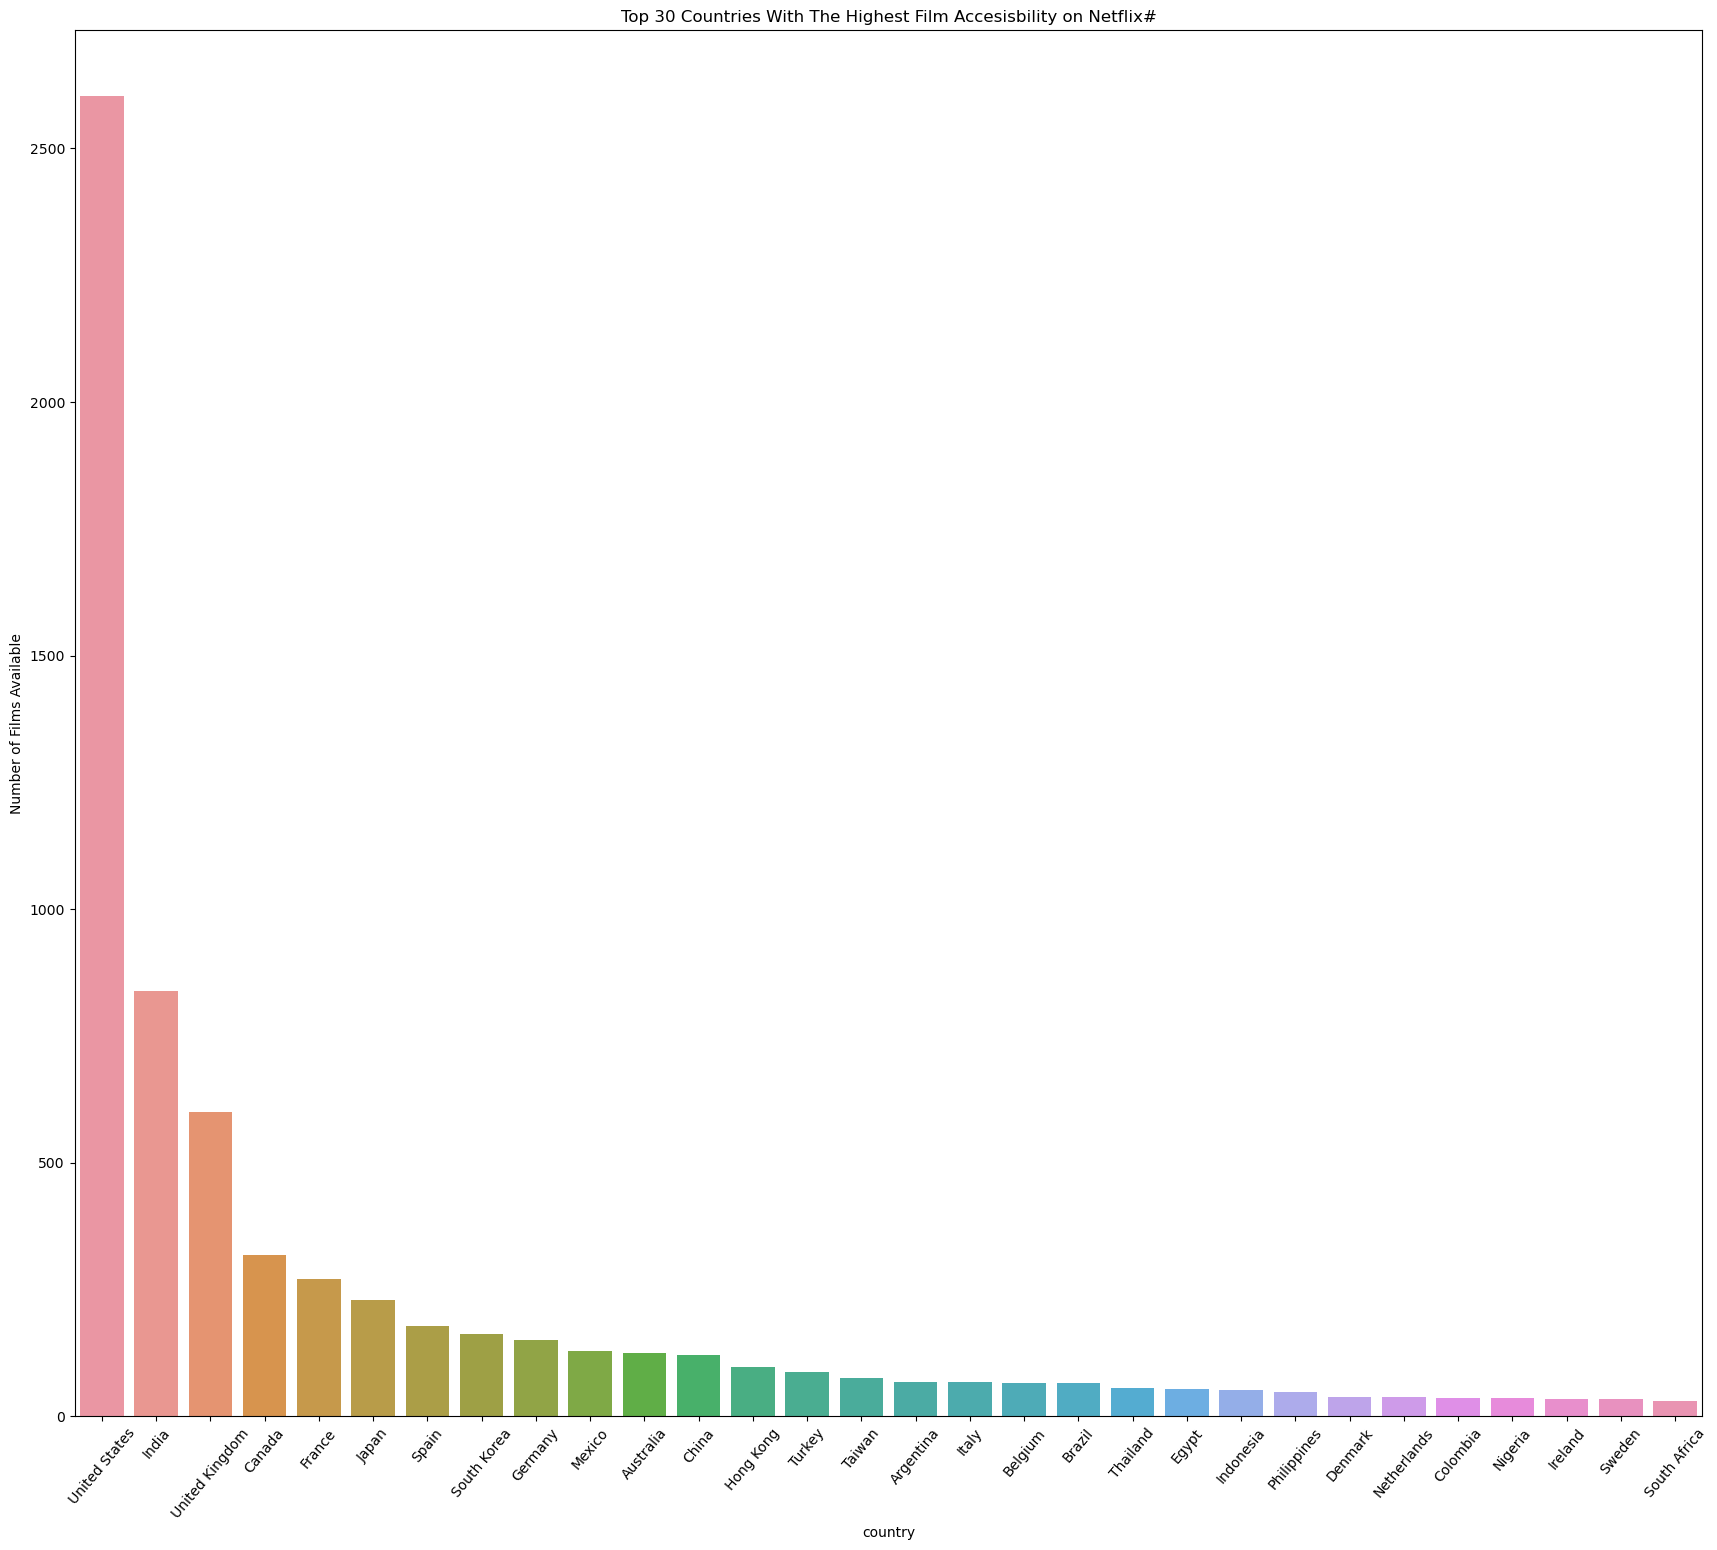

In [31]:
filter_countries = df.set_index('title')['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
filtered_countries = filter_countries[filter_countries != 'Unknown']

plt.figure(figsize=(21,18))
sns.countplot(filtered_countries, order=filtered_countries.value_counts().index[:30])
plt.xlabel('country')
plt.tick_params(axis='x', labelrotation=50)
plt.ylabel('Number of Films Available')
plt.title('Top 30 Countries With The Highest Film Accesisbility on Netflix#')

1. `filter_countries = df.set_index('title')['country'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)`: This line of code performs a series of operations to extract the individual countries from the 'country' column of the DataFrame `df`. It uses `str.split(', ')` to split the comma-separated countries in each cell into separate entries. The `stack()` function stacks the resulting split values, and `reset_index(level=1, drop=True)` resets the index, effectively converting the stacked data into a new Series `filter_countries` with the movie titles as the index and individual countries as the values.

2. `filtered_countries = filter_countries[filter_countries != 'Unknown']`: This line removes any entries in the `filter_countries` Series that have the value 'Unknown'. This is likely to filter out any movies with unspecified or missing country information.

3. `plt.figure(figsize=(21, 18))`: This line sets the figure size of the plot to be 21 inches in width and 18 inches in height. Adjusting the figure size ensures that the resulting count plot is appropriately sized and legible.

4. `sns.countplot(filtered_countries, order=filtered_countries.value_counts().index[:30])`: This line creates the count plot using `seaborn`'s `countplot` function. The plot represents the number of films available for each country in the `filtered_countries` Series.

   - `filtered_countries`: This specifies the data for the count plot, which is the Series containing the individual countries.

   - `order=filtered_countries.value_counts().index[:30]`: This parameter sets the order of the bars in the plot based on the count of films available in each country. The top 30 countries with the highest film accessibility on Netflix are selected and displayed in descending order.

5. `plt.xlabel('Country')`: This line labels the x-axis of the plot as 'Country,' representing the individual countries.

6. `plt.tick_params(axis='x', labelrotation=50)`: This line rotates the x-axis labels by 50 degrees, making the country names more readable when there are many countries displayed.

7. `plt.ylabel('Number of Films Available')`: This line labels the y-axis of the plot as 'Number of Films Available,' representing the count of films available in each country.

8. `plt.title('Top 30 Countries With The Highest Film Accessibility on Netflix#')`: This line sets the title of the plot to 'Top 30 Countries With The Highest Film Accessibility on Netflix#,' indicating that the plot represents the countries with the most films available on Netflix.

Observation:
The resulting count plot displays the top 30 countries with the highest film accessibility on Netflix, based on the availability of films in each country.

- The x-axis represents individual countries, while the y-axis represents the count of films available in each country.

- The bars in the plot are ordered from highest to lowest, with the countries having the most films available appearing at the leftmost side of the plot.

- By examining the plot, you can quickly identify the countries that offer the most extensive film libraries on Netflix.

- The countries on the x-axis are rotated by 50 degrees to ensure readability, especially when there are many countries displayed.

- The plot provides insights into the global distribution of films available on Netflix, highlighting the countries where the platform has a significant presence.

- You can observe the dominance of certain countries in terms of film accessibility on Netflix, which may indicate the popularity and relevance of their content to a global audience.

- The title, axis labels, and plot size are well-defined, providing context and ensuring that the plot is easy to interpret.


Unsurprisingly, the United States stands out on top since Netflix is an American company. India surprisingly comes in second followed by the UK and Canada. China interestingly is in the 12th position and not close to the top 10 even though it has about 18% of the world's population. Reasons for this could be for political reasons and the banning of certain applications which isn't uncommon between the United States and China.

Intrestingly, Nigeria is the top African country with the highest film accessibility on Neflix surpasing South Africa which occupies the 31st position.

More so, as at January 2020, Nigeria has access to 0.50% (36 films) of contents on Netflix; which is quite poor; given that Nigeria is the most populated black nation in the world with its Nollywood being one of the highest grossing industry in the country. The number of smartphone users have also doubled in the past couple of years, so Netflix still has a lot of work to do as regard penertrating the Nigerian market.

Although the dataset span from 2008 - January 2020, I'd like to believe there's a huge improvement on % of Netflix's content accesibilty in Nigeria

Text(0, 0.5, 'Genres')

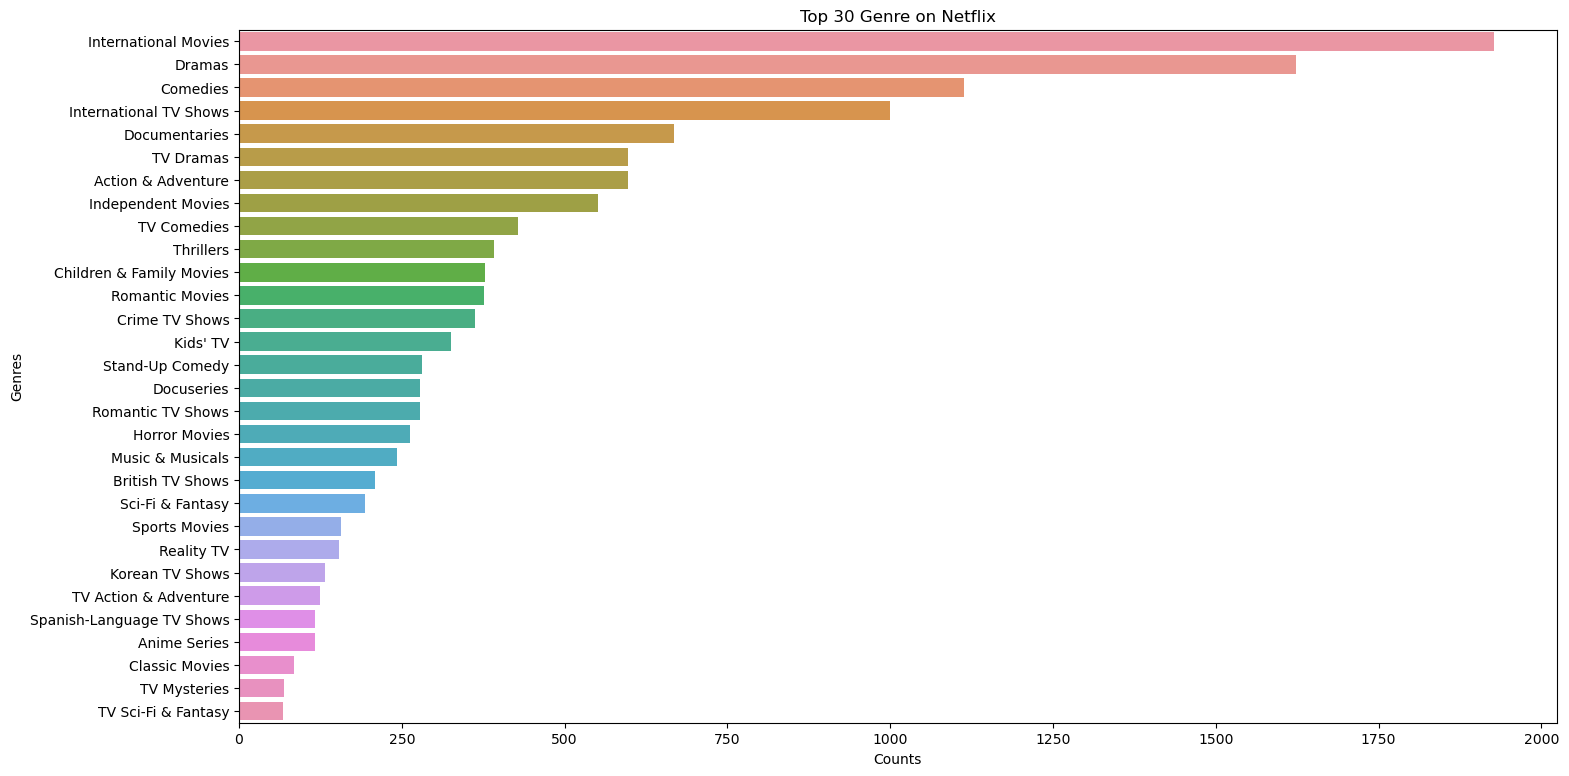

In [32]:
filtered_genres = df.set_index('title')['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)

plt.figure(figsize=(17,9))
sns.countplot(y= filtered_genres, order=filtered_genres.value_counts().index[:30])
plt.title('Top 30 Genre on Netflix')
plt.xlabel('Counts')
plt.ylabel('Genres')

1. `filtered_genres = df.set_index('title')['listed_in'].str.split(', ', expand=True).stack().reset_index(level=1, drop=True)`: This line of code performs a series of operations to extract the individual genres from the 'listed_in' column of the DataFrame `df`. It uses `str.split(', ')` to split the comma-separated genres in each cell into separate entries. The `stack()` function stacks the resulting split values, and `reset_index(level=1, drop=True)` resets the index, effectively converting the stacked data into a new Series `filtered_genres` with the movie and TV show titles as the index and individual genres as the values.

2. `plt.figure(figsize=(17, 9))`: This line sets the figure size of the plot to be 17 inches in width and 9 inches in height. Adjusting the figure size ensures that the resulting count plot is appropriately sized and legible.

3. `sns.countplot(y=filtered_genres, order=filtered_genres.value_counts().index[:30])`: This line creates the count plot using `seaborn`'s `countplot` function. The plot represents the number of movies and TV shows available in each genre, and the genres are displayed on the y-axis.

   - `y=filtered_genres`: This specifies the data for the count plot, which is the Series containing the individual genres.

   - `order=filtered_genres.value_counts().index[:30]`: This parameter sets the order of the bars in the plot based on the count of movies and TV shows in each genre. The top 30 genres with the highest counts are selected and displayed in descending order.

4. `plt.title('Top 30 Genre on Netflix')`: This line sets the title of the plot to 'Top 30 Genre on Netflix,' indicating that the plot represents the most popular genres based on the count of content available.

5. `plt.xlabel('Counts')`: This line labels the x-axis of the plot as 'Counts,' representing the number of movies and TV shows in each genre.

6. `plt.ylabel('Genres')`: This line labels the y-axis of the plot as 'Genres,' representing the individual genre categories.

Observation:
The resulting count plot displays the top 30 genres on Netflix based on the count of movies and TV shows falling into each genre category.

- The y-axis represents individual genres, while the x-axis represents the count of movies and TV shows available in each genre.

- The bars in the plot are ordered from highest to lowest, with the genres having the most content available appearing at the top of the plot.

- By examining the plot, you can quickly identify the most popular genres on Netflix and the genres that have the most extensive content libraries.

- The genres on the y-axis are displayed in descending order of popularity, allowing viewers to focus on the most relevant and frequently occurring genres.

- The plot provides insights into the diversity of content available on Netflix, indicating the platform's focus on offering a wide range of genres to cater to different viewer preferences.

- You can observe which genres are most prevalent on the platform and potentially identify trends or patterns in content production and consumption.

- The title, axis labels, and plot size are well-defined, providing context and ensuring that the plot is easy to interpret.

Overall,the most preferred genre is international movies followed by Drama which i thought would be first because people love drama.

Text(0, 0.5, 'Number of TV Shows')

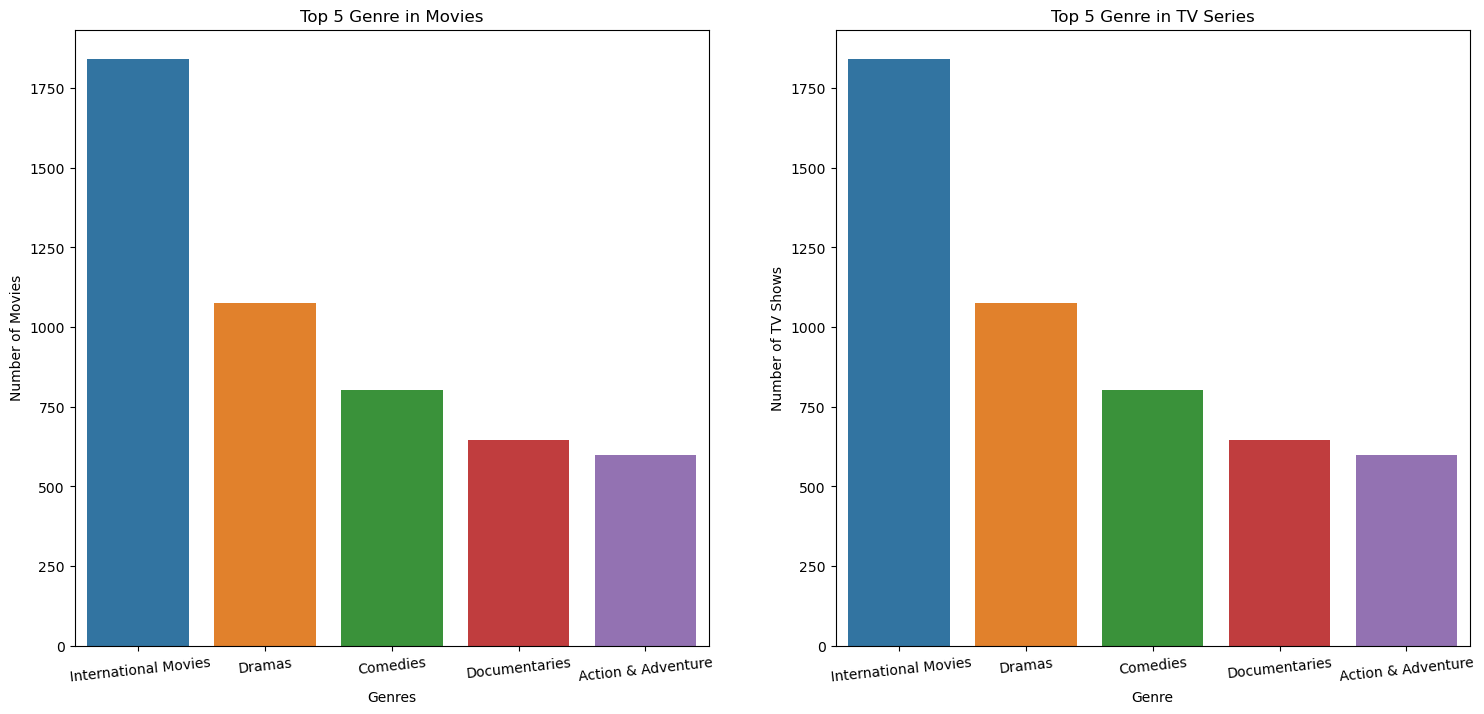

In [33]:
movies_genres = movies_df.set_index('title')['listed_in'].str.split(',', expand=True).stack().reset_index(level=1,drop=True)

series_genres = movies_df.set_index('title')['listed_in'].str.split(',', expand=True).stack().reset_index(level=1,drop=True)

fig, ax = plt.subplots(1,2,figsize=(18,8))
g1 = sns.countplot(movies_genres, order =movies_genres.value_counts().index[0:5], ax = ax[0])
g1.set_title('Top 5 Genre in Movies')
g1.set_xlabel('Genres')
g1.tick_params(axis='x', labelrotation=6)
g1.set_ylabel("Number of Movies")

g2 = sns.countplot(series_genres, order=series_genres.value_counts().index[:5], ax = ax[1])
g2.set_title('Top 5 Genre in TV Series')
g2.set_xlabel('Genre')
g2.tick_params(axis='x', labelrotation=6)
g2.set_ylabel('Number of TV Shows')

1. `movies_genres = movies_df.set_index('title')['listed_in'].str.split(',', expand=True).stack().reset_index(level=1,drop=True)`: This line of code performs a series of operations to extract the individual genres from the 'listed_in' column of the DataFrame `movies_df`. It uses `str.split(',')` to split the comma-separated genres in each cell into separate entries. The `stack()` function stacks the resulting split values, and `reset_index(level=1, drop=True)` resets the index, effectively converting the stacked data into a new Series `movies_genres` with the movie titles as the index and individual genres as the values.

2. `series_genres = movies_df.set_index('title')['listed_in'].str.split(',', expand=True).stack().reset_index(level=1,drop=True)`: This line performs the same series of operations as above but for the DataFrame `movies_df` again, which is likely to be a typo. It should ideally represent TV series data, but since it uses `movies_df`, it will be the same as `movies_genres`.

3. `fig, ax = plt.subplots(1, 2, figsize=(18, 8))`: This line creates a figure with two subplots side by side. The figure size is set to be 18 inches in width and 8 inches in height. The `subplots` function returns two objects: `fig` (the figure object) and `ax` (a NumPy array containing the two axes objects representing the subplots).

4. `g1 = sns.countplot(movies_genres, order=movies_genres.value_counts().index[0:5], ax=ax[0])`: This line creates the first subplot (the left one) and plots a count plot using `seaborn`'s `countplot` function. The plot represents the number of movies available in each genre.

   - `movies_genres`: This specifies the data for the first subplot, which is the Series containing the individual genres of movies.

   - `order=movies_genres.value_counts().index[0:5]`: This parameter sets the order of the bars in the plot based on the count of movies in each genre. The top 5 genres with the highest movie counts are selected and displayed in descending order.

   - `ax=ax[0]`: This parameter assigns the first axis object (`ax[0]`) to the first subplot, which means the count plot will be displayed on the left side.

5. `g1.set_title('Top 5 Genre in Movies')`: This line sets the title of the first subplot to 'Top 5 Genre in Movies,' indicating that the plot represents the most popular genres in movies.

6. `g1.set_xlabel('Genres')`: This line labels the x-axis of the first subplot as 'Genres,' representing the individual genre categories.

7. `g1.tick_params(axis='x', labelrotation=6)`: This line rotates the x-axis labels by 6 degrees, making the genre names more readable when displayed horizontally.

8. `g1.set_ylabel('Number of Movies')`: This line labels the y-axis of the first subplot as 'Number of Movies,' representing the count of movies in each genre.

9. `g2 = sns.countplot(series_genres, order=series_genres.value_counts().index[:5], ax=ax[1])`: This line creates the second subplot (the right one) and plots a count plot using `seaborn`'s `countplot` function. The plot represents the number of TV series available in each genre.

   - `series_genres`: This specifies the data for the second subplot, which is the Series containing the individual genres of TV series.

   - `order=series_genres.value_counts().index[:5]`: This parameter sets the order of the bars in the plot based on the count of TV series in each genre. The top 5 genres with the highest TV series counts are selected and displayed in descending order.

   - `ax=ax[1]`: This parameter assigns the second axis object (`ax[1]`) to the second subplot, which means the count plot will be displayed on the right side.

10. `g2.set_title('Top 5 Genre in TV Series')`: This line sets the title of the second subplot to 'Top 5 Genre in TV Series,' indicating that the plot represents the most popular genres in TV series.

11. `g2.set_xlabel('Genre')`: This line labels the x-axis of the second subplot as 'Genre,' representing the individual genre categories.

12. `g2.tick_params(axis='x', labelrotation=6)`: This line rotates the x-axis labels by 6 degrees, making the genre names more readable when displayed horizontally.

13. `g2.set_ylabel('Number of TV Shows')`: This line labels the y-axis of the second subplot as 'Number of TV Shows,' representing the count of TV series in each genre.

Observation:
The resulting figure displays two subplots side by side, each representing different aspects of genre distribution for movies and TV series on Netflix.

Left Subplot (Top 5 Genre in Movies):
- The x-axis represents individual genres, while the y-axis represents the count of movies available in each genre.

- The bars in the plot are ordered from highest to lowest, with the genres having the most movies available appearing at the top of the plot.

- By examining the left subplot, you can quickly identify the most popular genres among Netflix movies and the genres with the most extensive content libraries.

- The genres on the x-axis are displayed horizontally, and the rotation of the labels by 6 degrees ensures readability when there are long genre names.

Right Subplot (Top 5 Genre in TV Series):
- The x-axis represents individual genres, while the y-axis represents the count of TV series available in each genre.

- The bars in the plot are ordered from highest to lowest, with the genres having the most TV series available appearing at the top of the plot.

- By examining the right subplot, you can quickly identify the most popular genres among Netflix TV series and the genres with the most extensive content libraries.

- The genres on the x-axis are displayed horizontally, and the rotation of the labels by 6 degrees ensures readability when there are long genre names.

- The titles, axis labels, and plot sizes are well-defined, providing context and ensuring that the plots are easy to interpret.

Overall,international movies ranked highest in both movies and tv-shows. 

THE END! BACK TO TOP